In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurazione per grafici più belli
plt.style.use('default')
sns.set_palette("husl")

print("=== GPU BENCHMARK ANALYSIS: OCCUPANCY API vs HEURISTIC ===")

# Carica i dati GPU
try:
    df_occupancy = pd.read_csv('benchmark_results_GPU_occupancyAPI.csv')
    df_heuristic = pd.read_csv('benchmark_results_GPU_heuristic.csv')
    
    print(f"Occupancy API data: {len(df_occupancy)} rows")
    print(f"Heuristic data: {len(df_heuristic)} rows")
    
    # Verifica se i file hanno dati
    if len(df_occupancy) == 0 and len(df_heuristic) == 0:
        print("⚠️ ATTENZIONE: I file CSV sono vuoti!")
        print("Assicurati che i benchmark siano stati eseguiti correttamente.")
        
        # Mostra struttura attesa
        print("\nStruttura CSV attesa:")
        print("NumParticles,ExecutionMode,ForceMethod,IntegrationMethod,MeanStepsPerSecond,StdStepsPerSecond,CVStepsPerSecond,...")
        
        # Termina qui se non ci sono dati
        df = pd.DataFrame()
    else:
        # Aggiungi una colonna per identificare il metodo
        if len(df_occupancy) > 0:
            df_occupancy['BlockSizeMethod'] = 'OccupancyAPI'
        if len(df_heuristic) > 0:
            df_heuristic['BlockSizeMethod'] = 'Heuristic'
        
        # Combina i dataset (solo quelli non vuoti)
        dfs_to_concat = []
        if len(df_occupancy) > 0:
            dfs_to_concat.append(df_occupancy)
        if len(df_heuristic) > 0:
            dfs_to_concat.append(df_heuristic)
        
        df = pd.concat(dfs_to_concat, ignore_index=True)
        
        # Filtra solo i test riusciti
        if 'Success' in df.columns:
            df = df[df['Success'] == True]
        
        print(f"Configurazioni testate totali: {len(df)}")
        print(f"Metodi block size: {df['BlockSizeMethod'].unique() if 'BlockSizeMethod' in df.columns else 'N/A'}")
        if len(df) > 0:
            print(f"Range particelle: {df['NumParticles'].min():,} - {df['NumParticles'].max():,}")
            print("Colonne disponibili:")
            for col in df.columns:
                print(f"  - {col}")
        
except FileNotFoundError as e:
    print(f"❌ Errore nel caricamento dei file: {e}")
    print("Assicurati che i file CSV siano presenti nella directory corretta")
    df = pd.DataFrame()

# Definisci metodi per analisi (se abbiamo dati)
if len(df) > 0 and 'ForceMethod' in df.columns and 'IntegrationMethod' in df.columns:
    methods = df.groupby(['ForceMethod', 'IntegrationMethod']).size().index.tolist()
    print(f"\n✓ Metodi trovati: {methods}")
else:
    methods = [
        ('PAIRWISE', 'EULER'),
        ('PAIRWISE', 'VELOCITY_VERLET'),
        ('ADAPTIVE_MUTUAL', 'EULER'),
        ('ADAPTIVE_MUTUAL', 'VELOCITY_VERLET')
    ]
    print(f"\n⚠️ Usando metodi predefiniti: {methods}")

if len(df) > 0:
    print("✅ Dati GPU caricati con successo!")
    print("✅ Pronto per analisi avanzata!")
else:
    print("❌ Nessun dato disponibile per l'analisi")

=== GPU BENCHMARK ANALYSIS: OCCUPANCY API vs HEURISTIC ===
Occupancy API data: 96 rows
Heuristic data: 96 rows
Configurazioni testate totali: 192
Metodi block size: ['OccupancyAPI' 'Heuristic']
Range particelle: 2 - 25,000
Colonne disponibili:
  - NumParticles
  - Years
  - DtYears
  - ExecutionMode
  - ForceMethod
  - IntegrationMethod
  - NumThreads
  - InitType
  - NumRuns
  - TotalSteps
  - MeanExecutionTime
  - StdExecutionTime
  - MeanStepsPerSecond
  - StdStepsPerSecond
  - CVStepsPerSecond
  - MinStepsPerSecond
  - MaxStepsPerSecond
  - MeanParticleStepsPerSecond
  - StdParticleStepsPerSecond
  - Success
  - ErrorMessage
  - BlockSizeMethod

✓ Metodi trovati: [('ADAPTIVE_MUTUAL', 'EULER'), ('ADAPTIVE_MUTUAL', 'VELOCITY_VERLET'), ('PAIRWISE', 'EULER'), ('PAIRWISE', 'VELOCITY_VERLET'), ('PAIRWISE_AVX2/FP32', 'EULER'), ('PAIRWISE_AVX2/FP32', 'VELOCITY_VERLET')]
✅ Dati GPU caricati con successo!
✅ Pronto per analisi avanzata!


In [2]:
# Visualizza i primi dati se disponibili
if len(df) > 0:
    print("=== ANTEPRIMA DATI ===")
    display(df.head())
    
    print(f"\n=== DISTRIBUZIONE DEI DATI ===")
    if 'BlockSizeMethod' in df.columns:
        print("Per metodo block size:")
        print(df['BlockSizeMethod'].value_counts())
    
    if 'NumParticles' in df.columns:
        print(f"\nNumeri di particelle testati:")
        particles_tested = sorted(df['NumParticles'].unique())
        print(particles_tested)
        
    if 'ForceMethod' in df.columns and 'IntegrationMethod' in df.columns:
        print(f"\nCombinazioni metodi:")
        method_combinations = df.groupby(['ForceMethod', 'IntegrationMethod']).size()
        print(method_combinations)
else:
    print("❌ Nessun dato da visualizzare")
    print("Per procedere con l'analisi, assicurati che:")
    print("1. I file 'benchmark_results_GPU_occupancyAPI.csv' e 'benchmark_results_GPU_heuristic.csv' siano presenti")
    print("2. I file contengano i risultati dei benchmark")
    print("3. Le colonne necessarie siano presenti (NumParticles, MeanStepsPerSecond, etc.)")

=== ANTEPRIMA DATI ===


,NumParticles,Years,DtYears,ExecutionMode,ForceMethod,IntegrationMethod,NumThreads,InitType,NumRuns,TotalSteps,...,MeanStepsPerSecond,StdStepsPerSecond,CVStepsPerSecond,MinStepsPerSecond,MaxStepsPerSecond,MeanParticleStepsPerSecond,StdParticleStepsPerSecond,Success,ErrorMessage,BlockSizeMethod
0,2,0.02,0.01,GPU,PAIRWISE,EULER,1,random,10,2,...,1331.62,341.73,0.2566,465.86,1581.49,2663.0,683.5,True,NaN,OccupancyAPI
1,2,0.02,0.01,GPU,PAIRWISE,VELOCITY_VERLET,1,random,10,2,...,1355.99,61.30,0.0452,1246.58,1478.98,2712.0,122.6,True,NaN,OccupancyAPI
2,2,0.02,0.01,GPU,PAIRWISE_AVX2/FP32,EULER,1,random,10,2,...,1299.57,179.61,0.1382,962.00,1444.03,2599.0,359.2,True,NaN,OccupancyAPI
3,2,0.02,0.01,GPU,PAIRWISE_AVX2/FP32,VELOCITY_VERLET,1,random,10,2,...,1209.02,216.05,0.1787,911.45,1462.40,2418.0,432.1,True,NaN,OccupancyAPI
4,2,0.02,0.01,GPU,ADAPTIVE_MUTUAL,EULER,1,random,10,2,...,1263.11,171.57,0.1358,962.03,1476.80,2526.0,343.1,True,NaN,OccupancyAPI



=== DISTRIBUZIONE DEI DATI ===
Per metodo block size:
BlockSizeMethod
OccupancyAPI    96
Heuristic       96
Name: count, dtype: int64

Numeri di particelle testati:
[np.int64(2), np.int64(5), np.int64(8), np.int64(10), np.int64(25), np.int64(50), np.int64(100), np.int64(250), np.int64(500), np.int64(750), np.int64(1000), np.int64(2500), np.int64(5000), np.int64(7500), np.int64(10000), np.int64(25000)]

Combinazioni metodi:
ForceMethod         IntegrationMethod
ADAPTIVE_MUTUAL     EULER                32
                    VELOCITY_VERLET      32
PAIRWISE            EULER                32
                    VELOCITY_VERLET      32
PAIRWISE_AVX2/FP32  EULER                32
                    VELOCITY_VERLET      32
dtype: int64


=== PERFORMANCE COMPARISON: OCCUPANCY API vs HEURISTIC ===


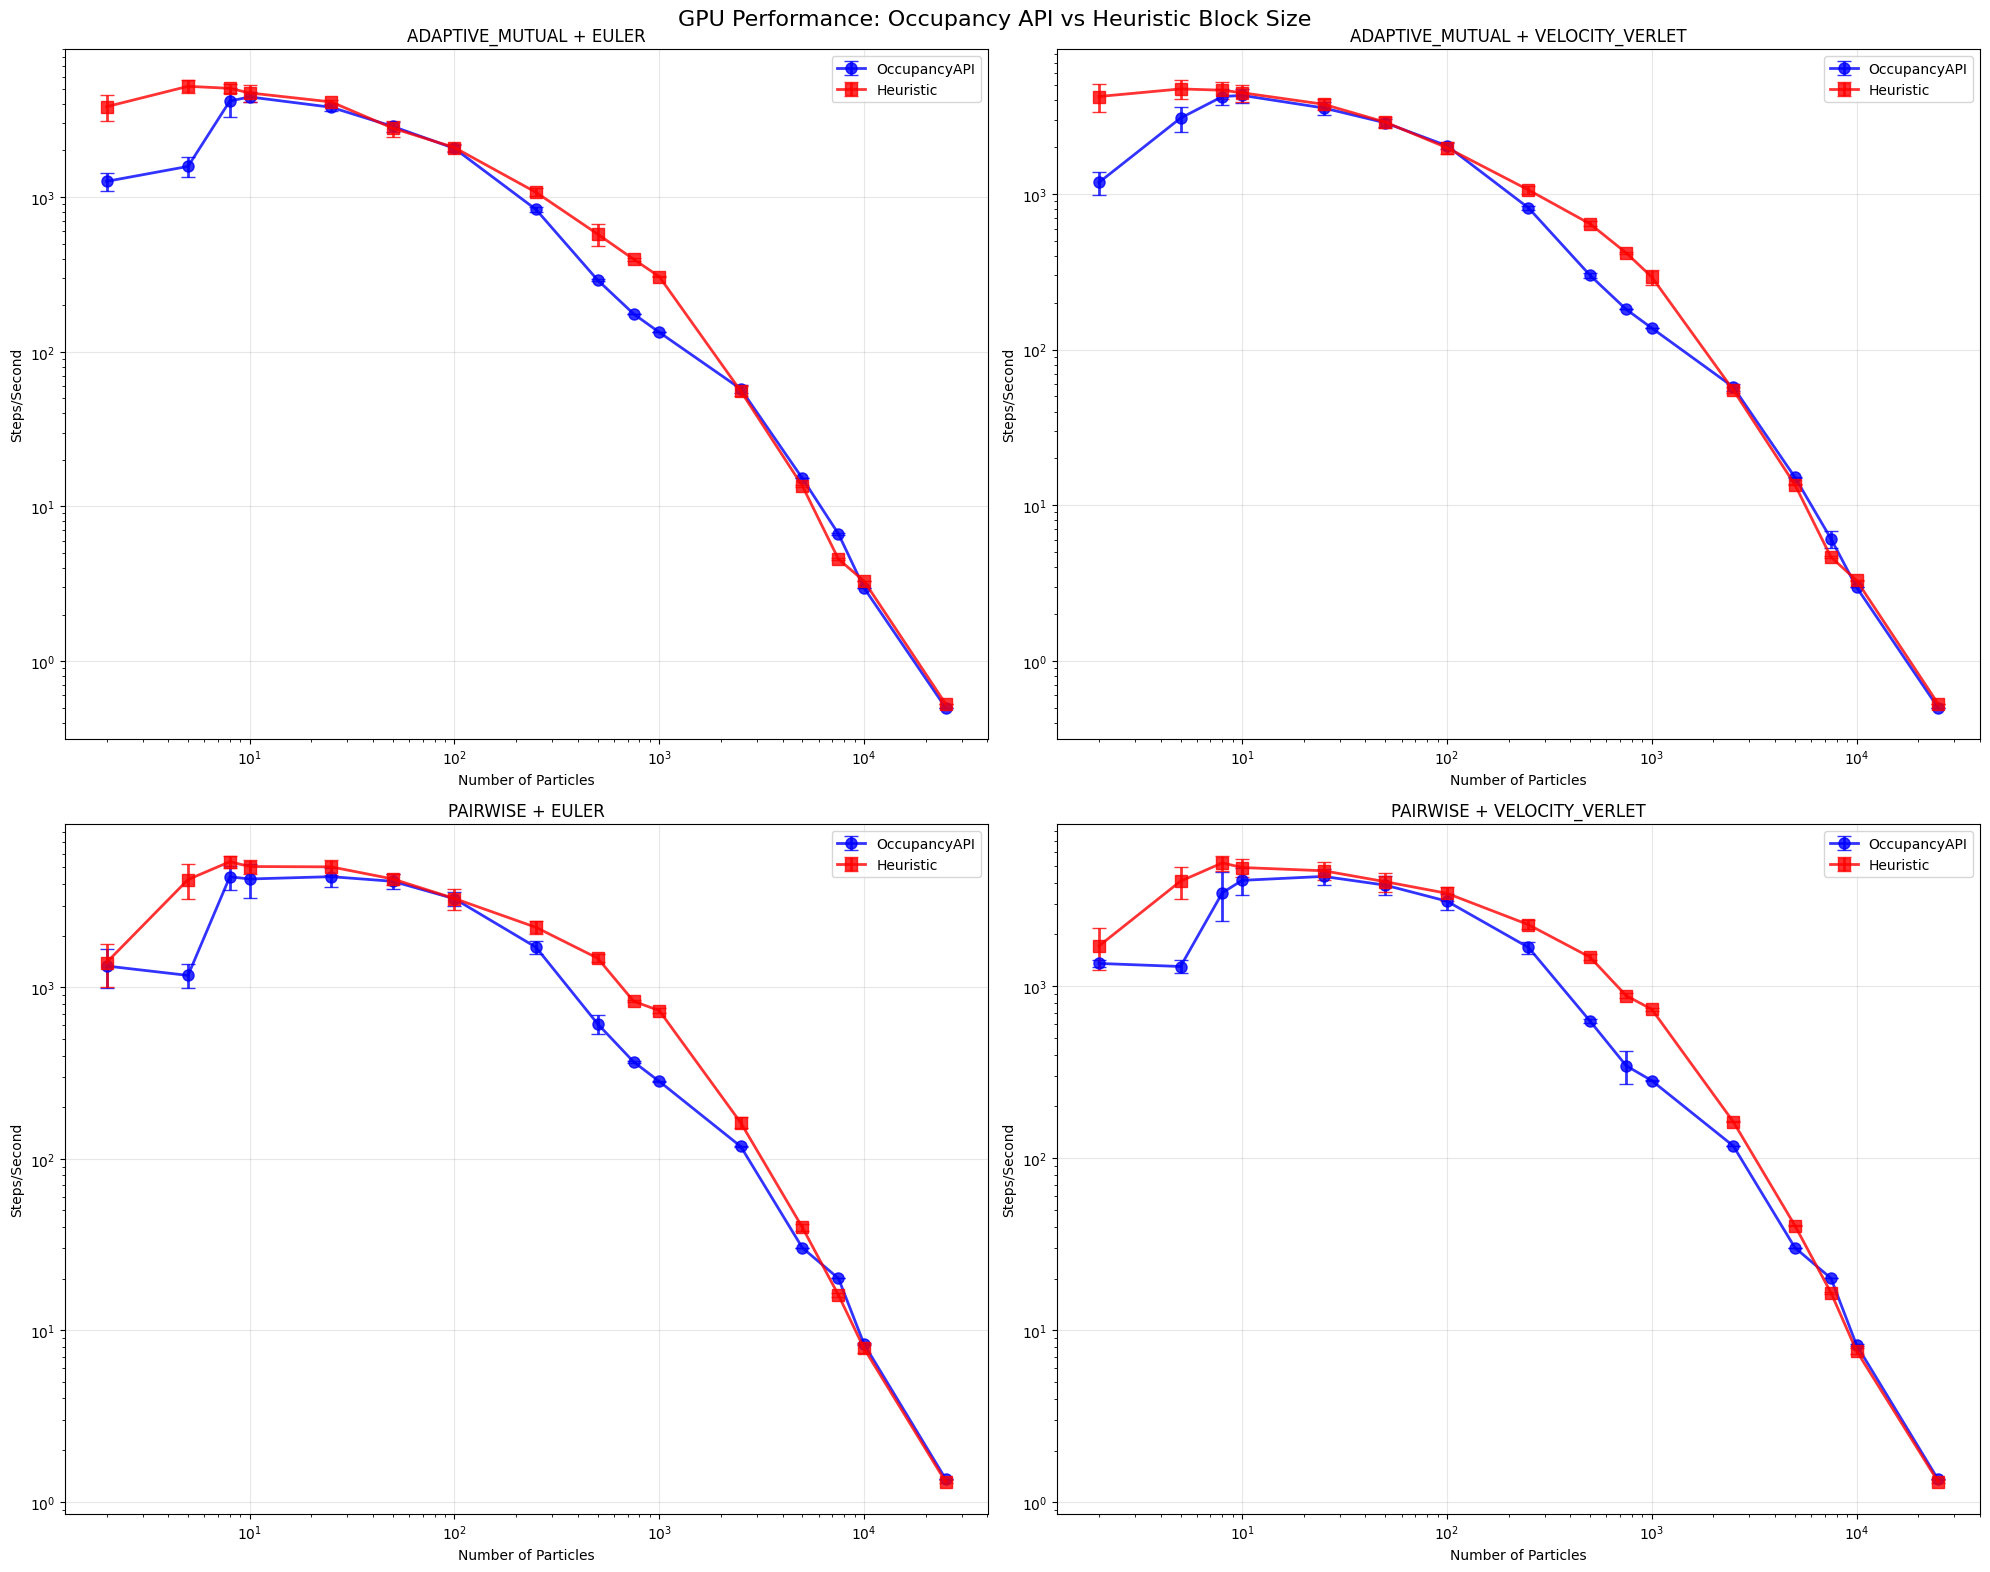

✅ Creati 4 grafici di performance


In [3]:
# 1. ANALISI PRINCIPALE: Mean Steps/Second vs N con Error Bars (solo se abbiamo dati)
if len(df) > 0 and 'MeanStepsPerSecond' in df.columns and 'NumParticles' in df.columns:
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('GPU Performance: Occupancy API vs Heuristic Block Size', fontsize=16)

    print("=== PERFORMANCE COMPARISON: OCCUPANCY API vs HEURISTIC ===")
    
    plots_created = 0
    
    for idx, (force_method, int_method) in enumerate(methods):
        if idx >= 4:  # Max 4 subplots
            break
            
        ax = axes[idx // 2, idx % 2]
        
        # Filtra per metodo specifico
        method_df = df[(df['ForceMethod'] == force_method) & (df['IntegrationMethod'] == int_method)]
        
        if len(method_df) == 0:
            ax.text(0.5, 0.5, f'Nessun dato per\n{force_method} + {int_method}', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(f'{force_method} + {int_method} - NO DATA')
            continue
        
        data_plotted = False
        
        for block_method, color, marker in [('OccupancyAPI', 'blue', 'o'), ('Heuristic', 'red', 's')]:
            data = method_df[method_df['BlockSizeMethod'] == block_method]
            
            if not data.empty:
                # Ordina per numero di particelle
                data_sorted = data.sort_values('NumParticles')
                
                # Usa StdStepsPerSecond se disponibile, altrimenti nessun errore
                if 'StdStepsPerSecond' in data_sorted.columns:
                    ax.errorbar(data_sorted['NumParticles'], data_sorted['MeanStepsPerSecond'], 
                               yerr=data_sorted['StdStepsPerSecond'], fmt=marker + '-', 
                               label=f'{block_method}', color=color,
                               capsize=5, linewidth=2, markersize=8, alpha=0.8)
                else:
                    ax.plot(data_sorted['NumParticles'], data_sorted['MeanStepsPerSecond'], 
                           marker + '-', label=f'{block_method}', color=color,
                           linewidth=2, markersize=8, alpha=0.8)
                
                data_plotted = True
        
        if data_plotted:
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xlabel('Number of Particles')
            ax.set_ylabel('Steps/Second')
            ax.set_title(f'{force_method} + {int_method}')
            ax.legend()
            ax.grid(True, alpha=0.3)
            plots_created += 1
    
    # Nascondi subplot vuoti
    for idx in range(plots_created, 4):
        axes[idx // 2, idx % 2].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Creati {plots_created} grafici di performance")
    
else:
    print("❌ Non posso creare i grafici di performance - dati mancanti")
    print("Colonne richieste: MeanStepsPerSecond, NumParticles")
    if len(df) > 0:
        print(f"Colonne disponibili: {list(df.columns)}")


=== SPEEDUP ANALYSIS ===
ADAPTIVE_MUTUAL+EULER, 2 particles: 0.329±0.078x speedup
ADAPTIVE_MUTUAL+EULER, 5 particles: 0.304±0.053x speedup
ADAPTIVE_MUTUAL+EULER, 8 particles: 0.828±0.178x speedup
ADAPTIVE_MUTUAL+EULER, 10 particles: 0.942±0.134x speedup
ADAPTIVE_MUTUAL+EULER, 25 particles: 0.924±0.058x speedup
ADAPTIVE_MUTUAL+EULER, 50 particles: 1.027±0.145x speedup
ADAPTIVE_MUTUAL+EULER, 100 particles: 0.987±0.071x speedup
ADAPTIVE_MUTUAL+EULER, 250 particles: 0.775±0.056x speedup
ADAPTIVE_MUTUAL+EULER, 500 particles: 0.504±0.080x speedup
ADAPTIVE_MUTUAL+EULER, 750 particles: 0.443±0.009x speedup
ADAPTIVE_MUTUAL+EULER, 1000 particles: 0.436±0.002x speedup
ADAPTIVE_MUTUAL+EULER, 2500 particles: 1.033±0.093x speedup
ADAPTIVE_MUTUAL+EULER, 5000 particles: 1.120±0.021x speedup
ADAPTIVE_MUTUAL+EULER, 7500 particles: 1.456±0.036x speedup
ADAPTIVE_MUTUAL+EULER, 10000 particles: 0.903±0.004x speedup
ADAPTIVE_MUTUAL+EULER, 25000 particles: 0.943±0.000x speedup
ADAPTIVE_MUTUAL+VELOCITY_VERLET

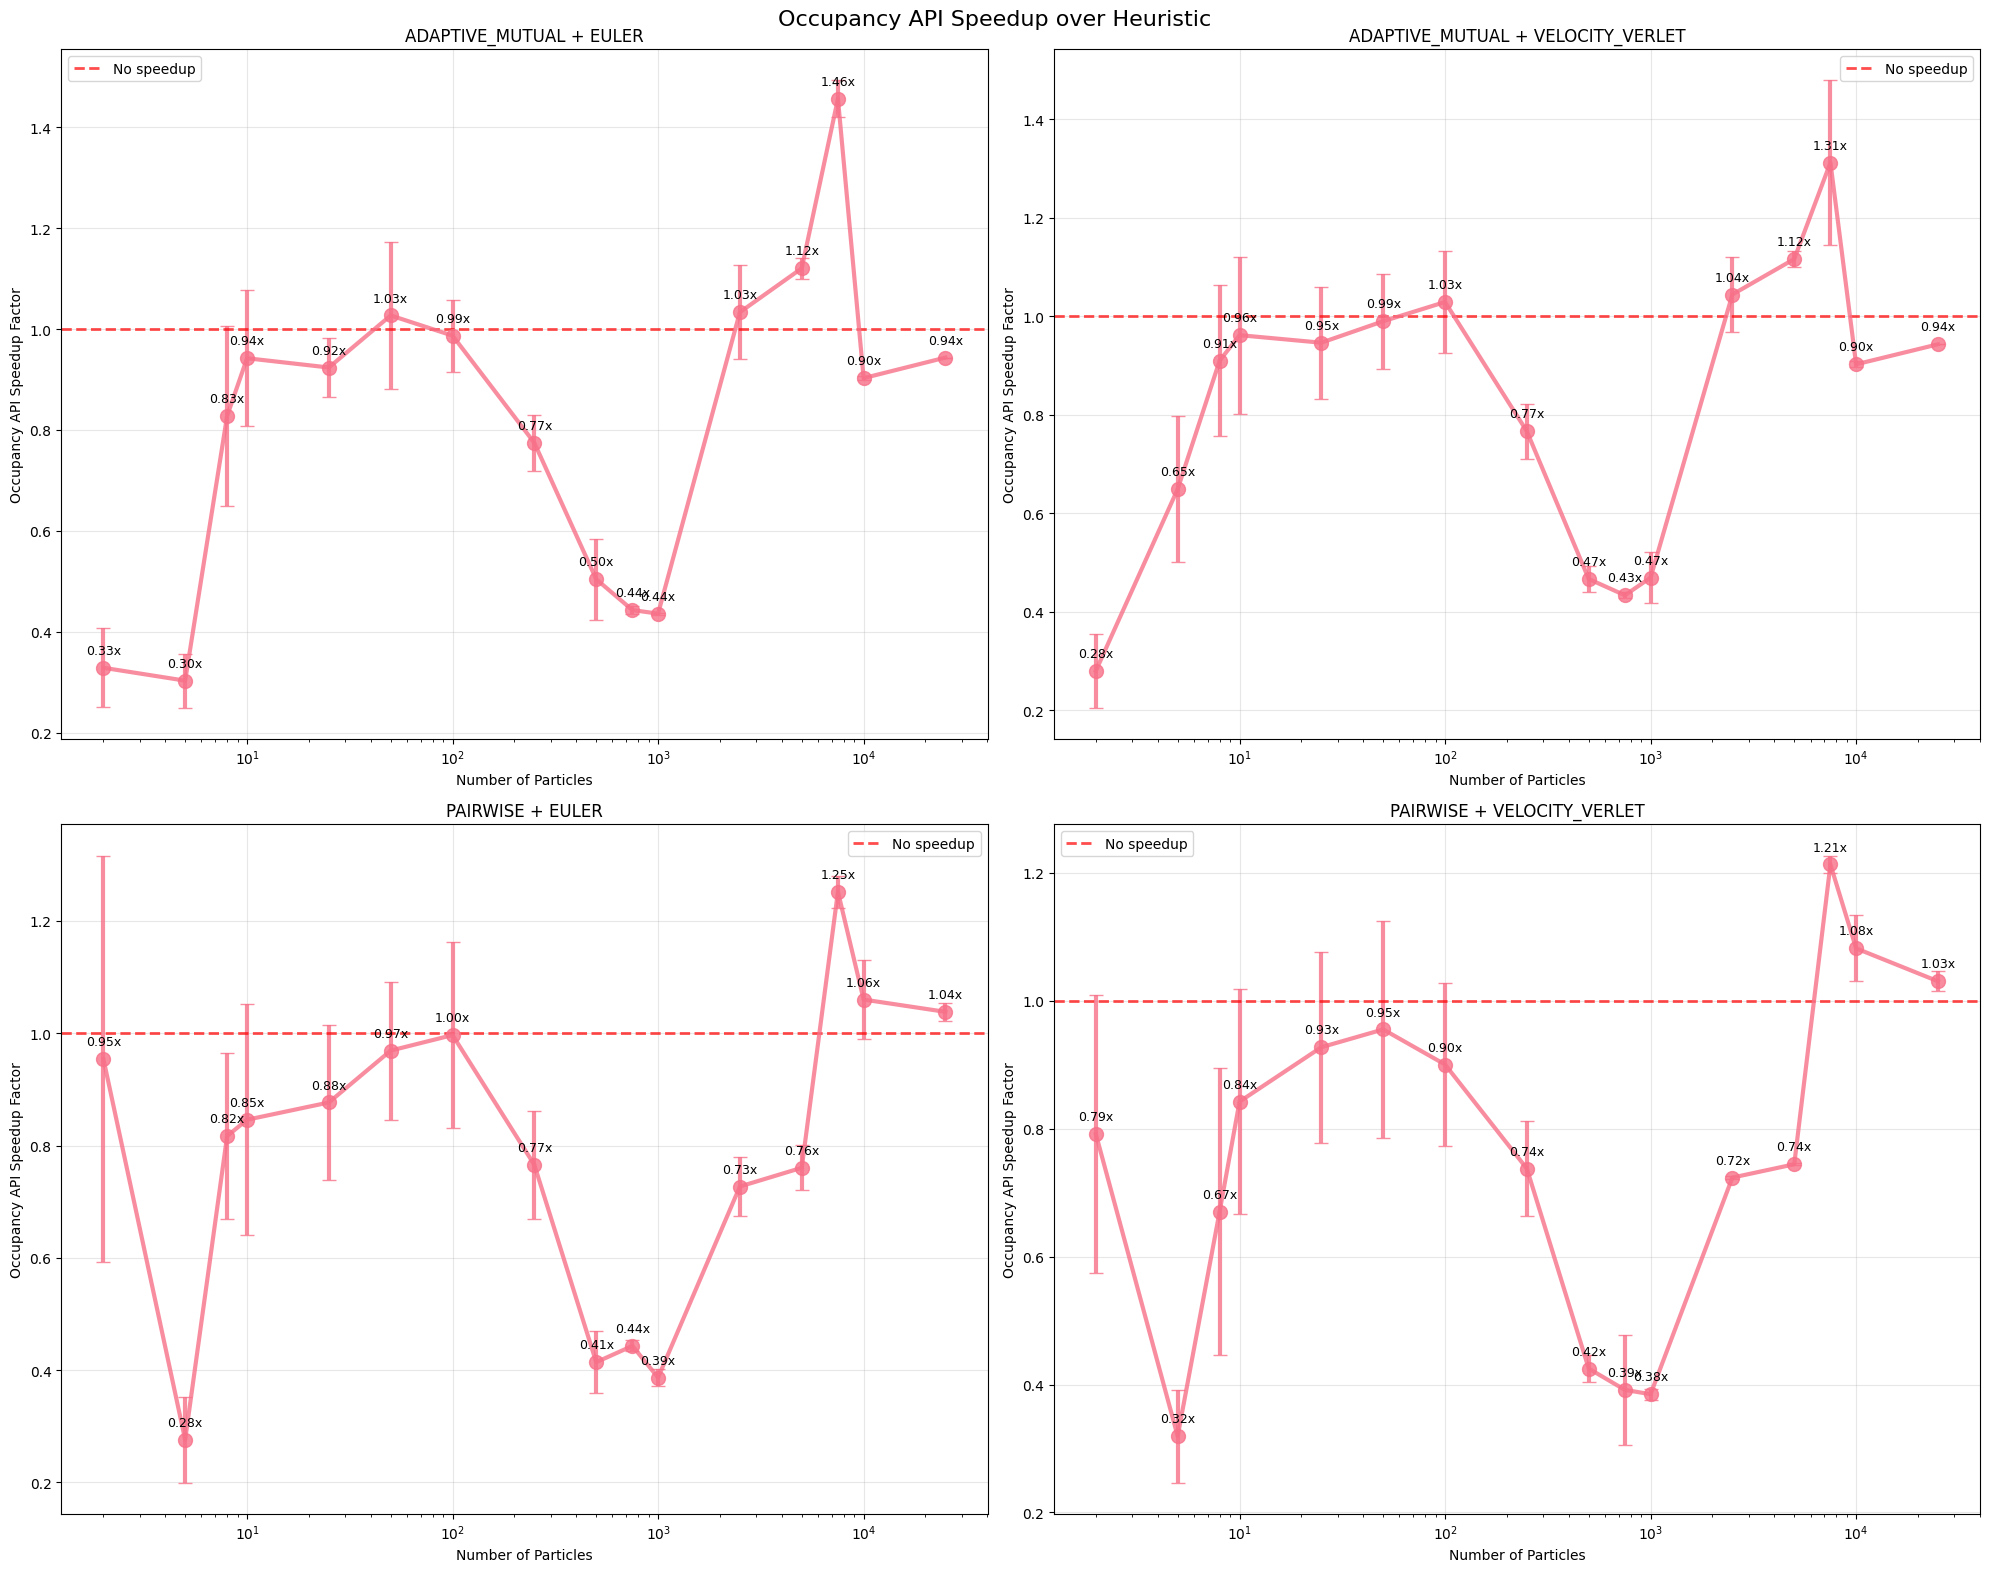

✅ Analisi speedup completata per 4 configurazioni


In [4]:
# 2. SPEEDUP ANALYSIS: Occupancy API vs Heuristic (solo se abbiamo dati sufficienti)
if len(df) > 0 and 'BlockSizeMethod' in df.columns and 'MeanStepsPerSecond' in df.columns:
    
    # Verifica se abbiamo entrambi i metodi
    available_methods = df['BlockSizeMethod'].unique()
    
    if len(available_methods) >= 2 and 'OccupancyAPI' in available_methods and 'Heuristic' in available_methods:
        
        fig, axes = plt.subplots(2, 2, figsize=(20, 16))
        fig.suptitle('Occupancy API Speedup over Heuristic', fontsize=16)

        print("\n=== SPEEDUP ANALYSIS ===")
        
        plots_created = 0
        
        for idx, (force_method, int_method) in enumerate(methods):
            if idx >= 4:
                break
                
            ax = axes[idx // 2, idx % 2]
            
            method_df = df[(df['ForceMethod'] == force_method) & (df['IntegrationMethod'] == int_method)]
            
            if len(method_df) == 0:
                ax.text(0.5, 0.5, f'Nessun dato per\n{force_method} + {int_method}', 
                       ha='center', va='center', transform=ax.transAxes, fontsize=12)
                continue
            
            speedup_data = []
            speedup_err = []
            particles_list = []
            
            for num_particles in sorted(method_df['NumParticles'].unique()):
                occupancy_data = method_df[(method_df['BlockSizeMethod'] == 'OccupancyAPI') & 
                                          (method_df['NumParticles'] == num_particles)]
                heuristic_data = method_df[(method_df['BlockSizeMethod'] == 'Heuristic') & 
                                          (method_df['NumParticles'] == num_particles)]
                
                if not occupancy_data.empty and not heuristic_data.empty:
                    occ_mean = occupancy_data['MeanStepsPerSecond'].iloc[0]
                    heur_mean = heuristic_data['MeanStepsPerSecond'].iloc[0]
                    
                    if heur_mean > 0:
                        speedup = occ_mean / heur_mean
                        
                        # Calcola errore se disponibile
                        speedup_error = 0
                        if 'StdStepsPerSecond' in occupancy_data.columns and 'StdStepsPerSecond' in heuristic_data.columns:
                            occ_std = occupancy_data['StdStepsPerSecond'].iloc[0]
                            heur_std = heuristic_data['StdStepsPerSecond'].iloc[0]
                            # Propagazione errore approssimativa
                            if occ_mean > 0 and heur_mean > 0:
                                speedup_error = speedup * np.sqrt((occ_std/occ_mean)**2 + (heur_std/heur_mean)**2)
                        
                        speedup_data.append(speedup)
                        speedup_err.append(speedup_error)
                        particles_list.append(num_particles)
                        
                        print(f"{force_method}+{int_method}, {num_particles} particles: {speedup:.3f}±{speedup_error:.3f}x speedup")
            
            if speedup_data:
                if any(err > 0 for err in speedup_err):
                    ax.errorbar(particles_list, speedup_data, yerr=speedup_err, fmt='o-', 
                               linewidth=3, markersize=10, capsize=5, alpha=0.8)
                else:
                    ax.plot(particles_list, speedup_data, 'o-', 
                           linewidth=3, markersize=10, alpha=0.8)
                
                # Aggiungi valori numerici sui punti
                for x, y in zip(particles_list, speedup_data):
                    ax.annotate(f'{y:.2f}x', (x, y), textcoords="offset points", 
                               xytext=(0,10), ha='center', fontsize=9)
                
                ax.axhline(y=1, color='r', linestyle='--', alpha=0.7, linewidth=2, label='No speedup')
                ax.set_xlabel('Number of Particles')
                ax.set_ylabel('Occupancy API Speedup Factor')
                ax.set_title(f'{force_method} + {int_method}')
                ax.set_xscale('log')
                ax.grid(True, alpha=0.3)
                ax.legend()
                plots_created += 1
        
        # Nascondi subplot vuoti
        for idx in range(plots_created, 4):
            axes[idx // 2, idx % 2].set_visible(False)

        plt.tight_layout()
        plt.show()
        
        print(f"✅ Analisi speedup completata per {plots_created} configurazioni")
        
    else:
        print("❌ Non posso fare l'analisi speedup - servono dati sia OccupancyAPI che Heuristic")
        print(f"Metodi disponibili: {available_methods}")
else:
    print("❌ Non posso fare l'analisi speedup - colonne mancanti")


=== STABILITY ANALYSIS ===


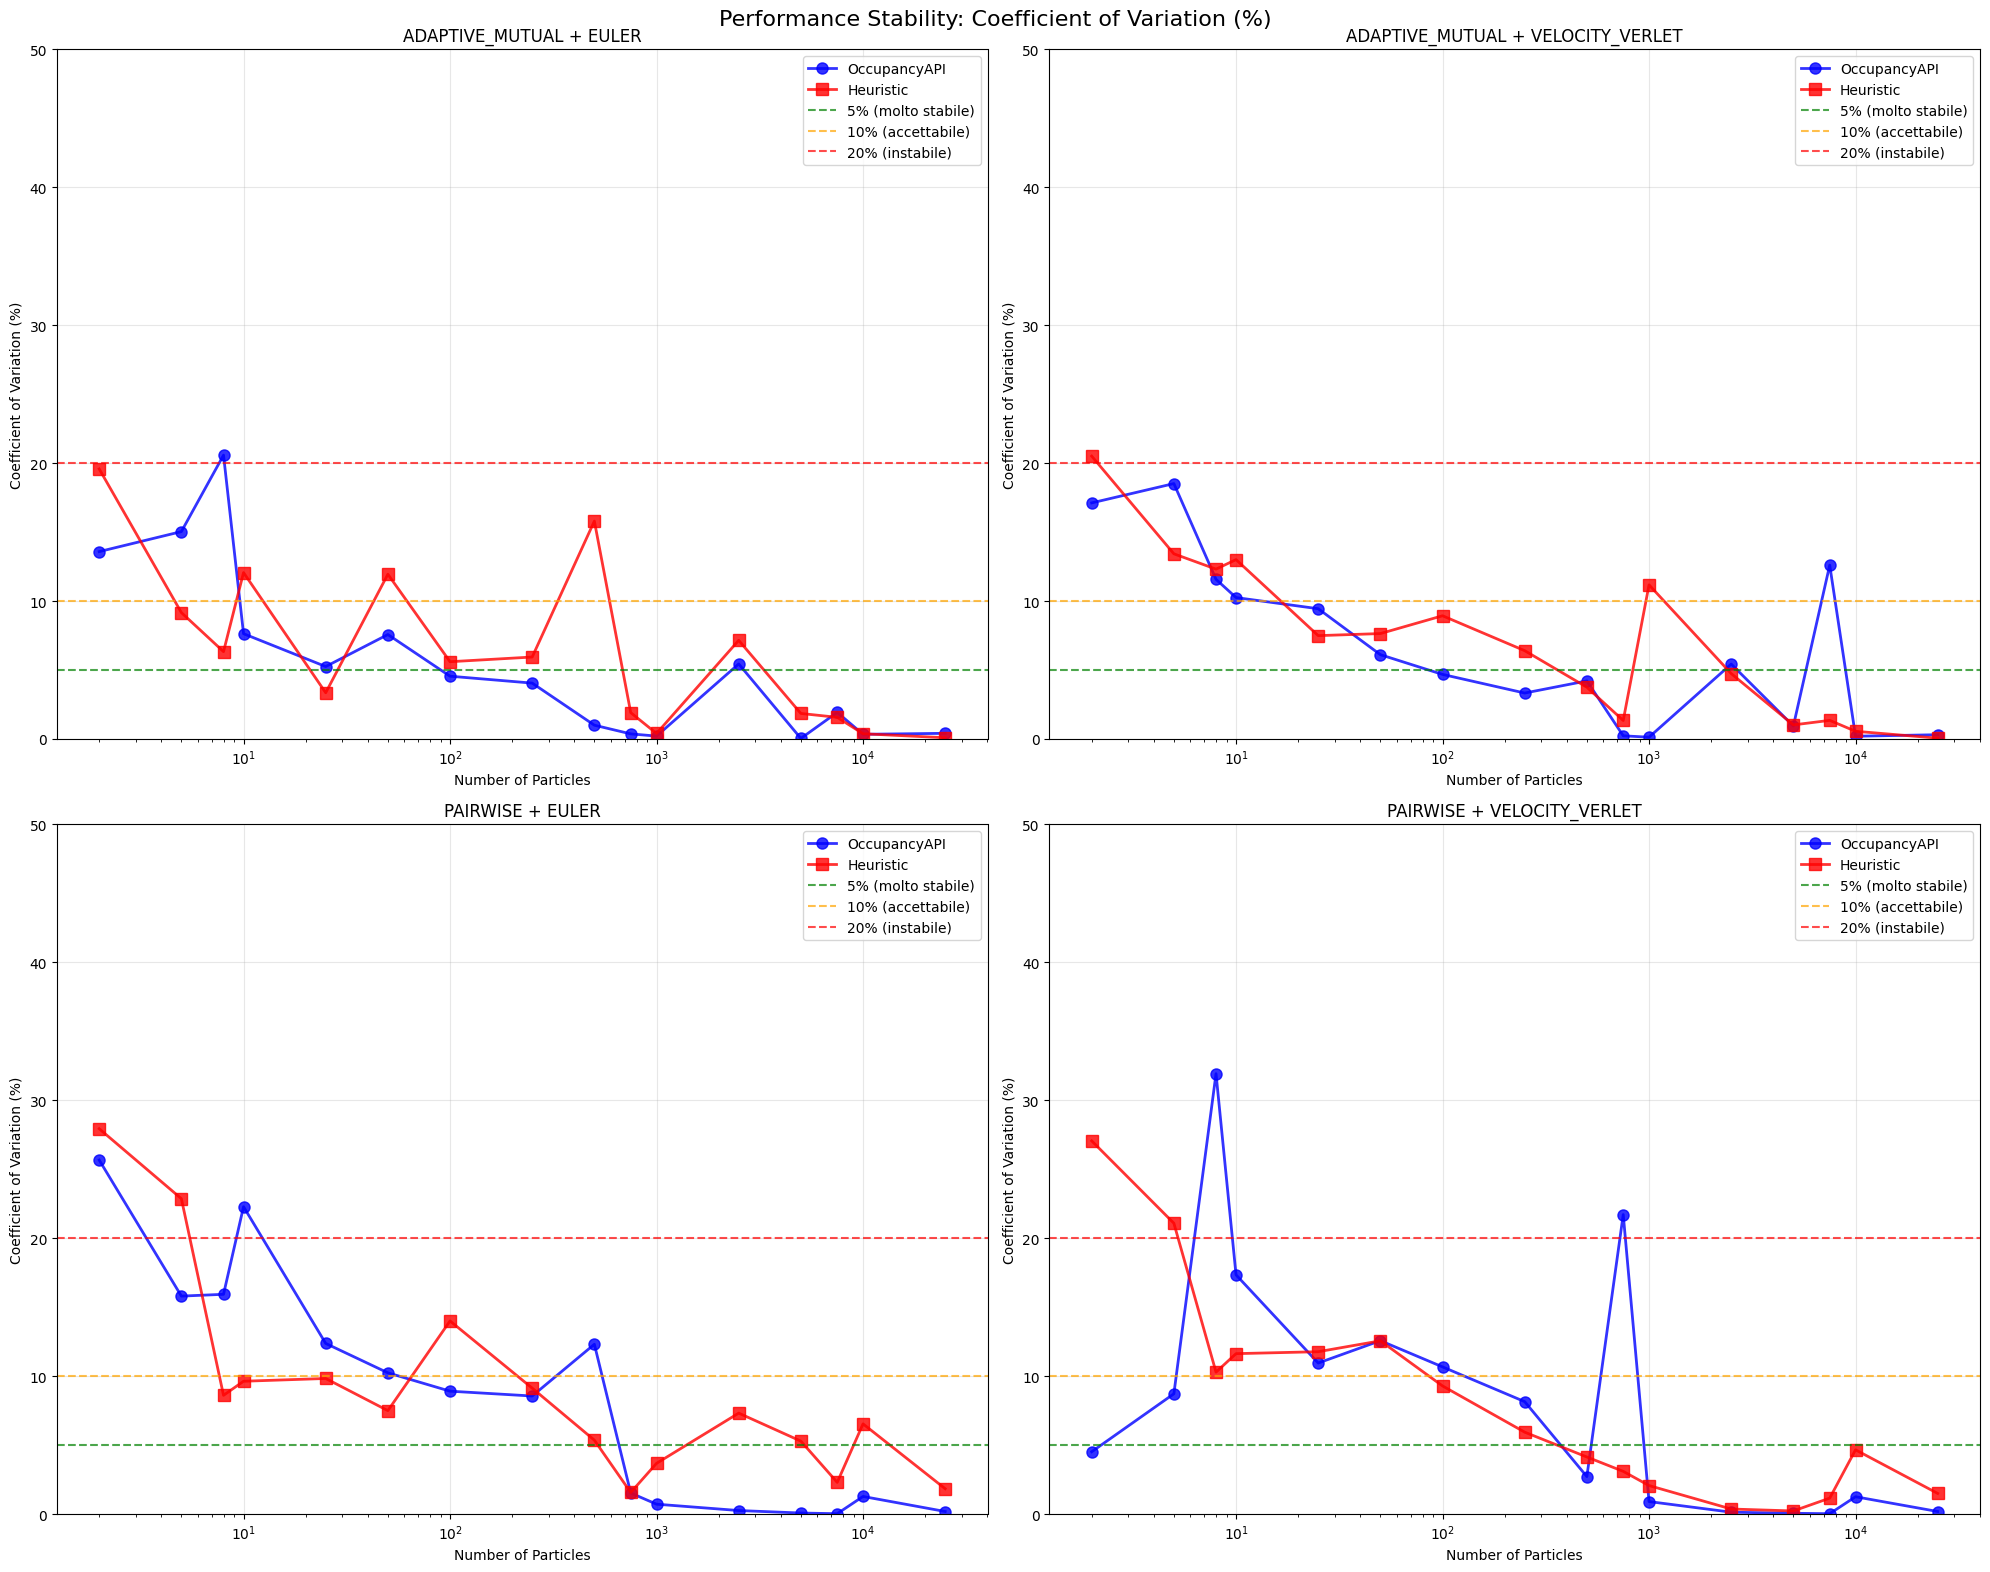

✅ Analisi stabilità completata per 4 configurazioni


In [5]:
# 3. STABILITY ANALYSIS: Coefficient of Variation (se disponibile)
if len(df) > 0 and 'CVStepsPerSecond' in df.columns:
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Performance Stability: Coefficient of Variation (%)', fontsize=16)

    print("\n=== STABILITY ANALYSIS ===")
    plots_created = 0
    
    for idx, (force_method, int_method) in enumerate(methods):
        if idx >= 4:
            break
            
        ax = axes[idx // 2, idx % 2]
        
        method_df = df[(df['ForceMethod'] == force_method) & (df['IntegrationMethod'] == int_method)]
        
        if len(method_df) == 0:
            ax.text(0.5, 0.5, f'Nessun dato per\n{force_method} + {int_method}', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            continue
        
        data_plotted = False
        
        for block_method, color, marker in [('OccupancyAPI', 'blue', 'o'), ('Heuristic', 'red', 's')]:
            data = method_df[method_df['BlockSizeMethod'] == block_method]
            
            if not data.empty:
                data_sorted = data.sort_values('NumParticles')
                ax.semilogx(data_sorted['NumParticles'], data_sorted['CVStepsPerSecond'] * 100, 
                           marker + '-', label=f'{block_method}', color=color, 
                           linewidth=2, markersize=8, alpha=0.8)
                data_plotted = True
        
        if data_plotted:
            # Linee guida per interpretazione
            ax.axhline(y=5, color='g', linestyle='--', alpha=0.7, label='5% (molto stabile)')
            ax.axhline(y=10, color='orange', linestyle='--', alpha=0.7, label='10% (accettabile)')
            ax.axhline(y=20, color='r', linestyle='--', alpha=0.7, label='20% (instabile)')
            
            ax.set_xlabel('Number of Particles')
            ax.set_ylabel('Coefficient of Variation (%)')
            ax.set_title(f'{force_method} + {int_method}')
            ax.legend()
            ax.grid(True, alpha=0.3)
            ax.set_ylim(0, 50)
            plots_created += 1

    # Nascondi subplot vuoti
    for idx in range(plots_created, 4):
        axes[idx // 2, idx % 2].set_visible(False)

    plt.tight_layout()
    plt.show()
    
    print(f"✅ Analisi stabilità completata per {plots_created} configurazioni")
    
elif len(df) > 0:
    print("❌ CVStepsPerSecond non disponibile - skippo analisi stabilità")
    print("Colonne statistiche trovate:")
    stat_cols = [col for col in df.columns if any(stat in col.lower() for stat in ['std', 'cv', 'mean'])]
    for col in stat_cols:
        print(f"  - {col}")
else:
    print("❌ Nessun dato per analisi stabilità")

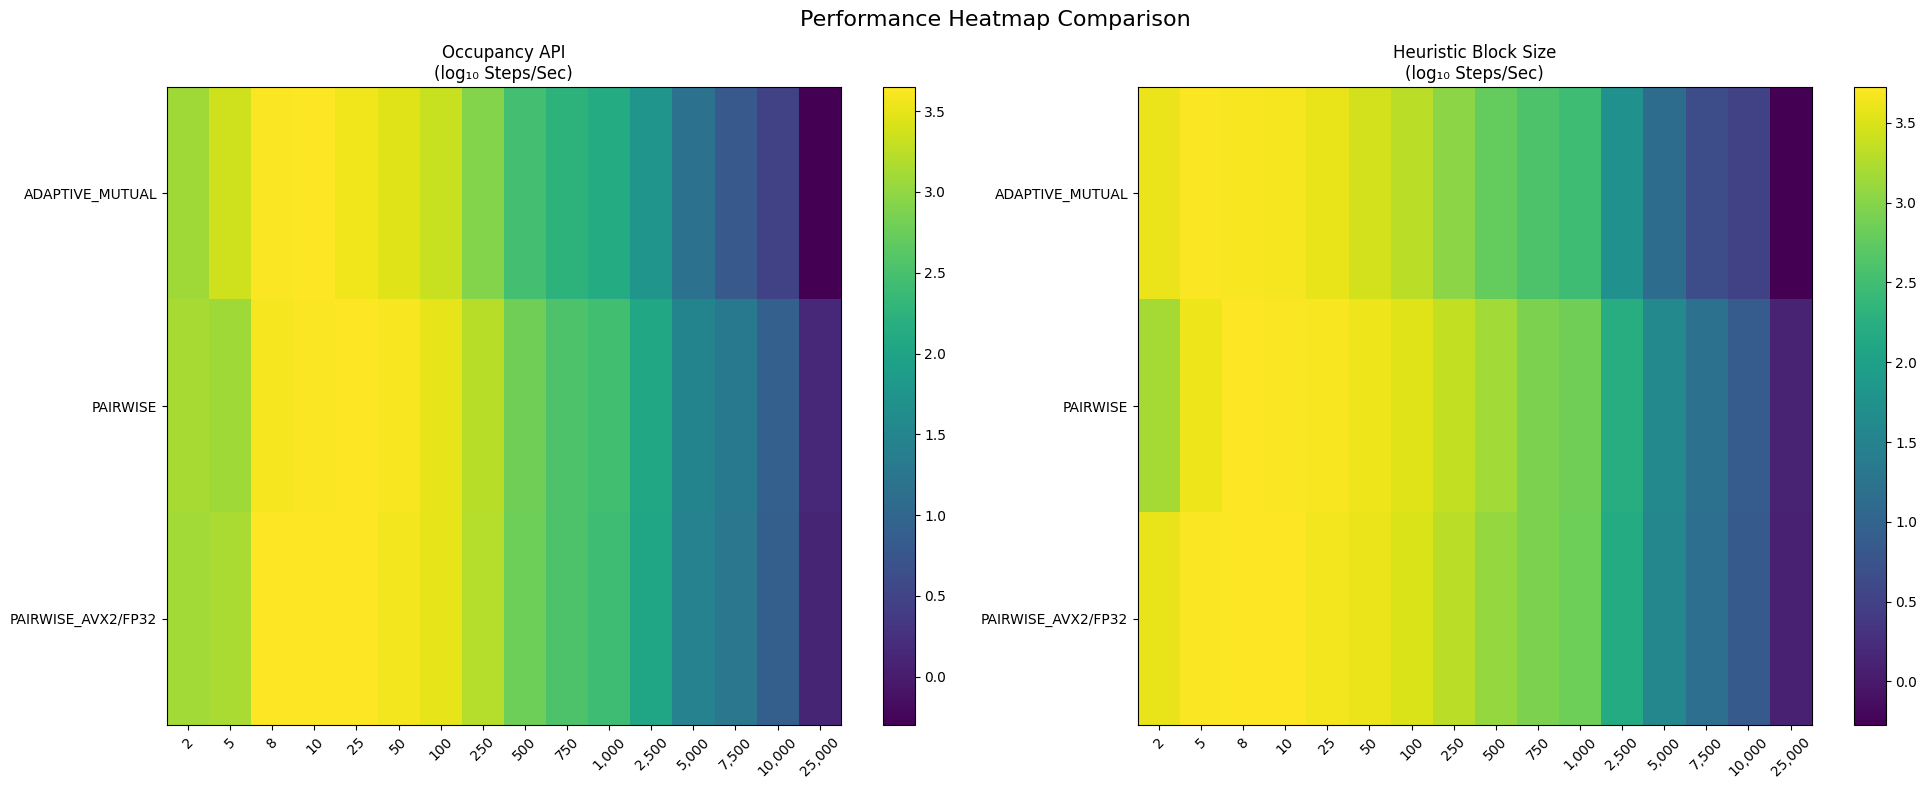

✅ Heatmap comparison creata


In [6]:
# 4. HEATMAP COMPARISON (se abbiamo dati sufficienti)
if len(df) > 0 and len(df['BlockSizeMethod'].unique()) >= 2:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Performance Heatmap Comparison', fontsize=16)

    # Heatmap per OccupancyAPI
    occupancy_data = df[df['BlockSizeMethod'] == 'OccupancyAPI']
    if not occupancy_data.empty and 'ForceMethod' in occupancy_data.columns:
        try:
            occupancy_pivot = occupancy_data.pivot_table(
                values='MeanStepsPerSecond', 
                index='ForceMethod', 
                columns='NumParticles', 
                aggfunc='mean'
            )
            
            if not occupancy_pivot.empty:
                im1 = ax1.imshow(np.log10(occupancy_pivot.values), cmap='viridis', aspect='auto')
                ax1.set_xticks(range(len(occupancy_pivot.columns)))
                ax1.set_xticklabels([f'{int(x):,}' for x in occupancy_pivot.columns], rotation=45)
                ax1.set_yticks(range(len(occupancy_pivot.index)))
                ax1.set_yticklabels(occupancy_pivot.index)
                ax1.set_title('Occupancy API\n(log₁₀ Steps/Sec)')
                plt.colorbar(im1, ax=ax1)
            else:
                ax1.text(0.5, 0.5, 'Occupancy API\nDati insufficienti', ha='center', va='center', transform=ax1.transAxes)
        except Exception as e:
            ax1.text(0.5, 0.5, f'Occupancy API\nErrore: {str(e)[:50]}...', ha='center', va='center', transform=ax1.transAxes)
    else:
        ax1.text(0.5, 0.5, 'Occupancy API\nNessun dato', ha='center', va='center', transform=ax1.transAxes)

    # Heatmap per Heuristic
    heuristic_data = df[df['BlockSizeMethod'] == 'Heuristic']
    if not heuristic_data.empty and 'ForceMethod' in heuristic_data.columns:
        try:
            heuristic_pivot = heuristic_data.pivot_table(
                values='MeanStepsPerSecond', 
                index='ForceMethod', 
                columns='NumParticles', 
                aggfunc='mean'
            )
            
            if not heuristic_pivot.empty:
                im2 = ax2.imshow(np.log10(heuristic_pivot.values), cmap='viridis', aspect='auto')
                ax2.set_xticks(range(len(heuristic_pivot.columns)))
                ax2.set_xticklabels([f'{int(x):,}' for x in heuristic_pivot.columns], rotation=45)
                ax2.set_yticks(range(len(heuristic_pivot.index)))
                ax2.set_yticklabels(heuristic_pivot.index)
                ax2.set_title('Heuristic Block Size\n(log₁₀ Steps/Sec)')
                plt.colorbar(im2, ax=ax2)
            else:
                ax2.text(0.5, 0.5, 'Heuristic\nDati insufficienti', ha='center', va='center', transform=ax2.transAxes)
        except Exception as e:
            ax2.text(0.5, 0.5, f'Heuristic\nErrore: {str(e)[:50]}...', ha='center', va='center', transform=ax2.transAxes)
    else:
        ax2.text(0.5, 0.5, 'Heuristic\nNessun dato', ha='center', va='center', transform=ax2.transAxes)

    plt.tight_layout()
    plt.show()
    
    print("✅ Heatmap comparison creata")

else:
    print("❌ Non posso creare heatmap - dati insufficienti")
    if len(df) > 0:
        print(f"Metodi block size disponibili: {df['BlockSizeMethod'].unique()}")

In [7]:
# 5. SUMMARY TABLE AND FINAL INSIGHTS
if len(df) > 0:
    print("=== TABELLA RIASSUNTIVA FINALE ===")

    summary_table = []
    
    # Raggruppa per combinazioni di metodi disponibili
    available_combinations = df.groupby(['ForceMethod', 'IntegrationMethod']).size().index.tolist()
    
    for force_method, int_method in available_combinations:
        
        occupancy_data = df[(df['ForceMethod'] == force_method) & 
                           (df['IntegrationMethod'] == int_method) & 
                           (df['BlockSizeMethod'] == 'OccupancyAPI')]
        
        heuristic_data = df[(df['ForceMethod'] == force_method) & 
                           (df['IntegrationMethod'] == int_method) & 
                           (df['BlockSizeMethod'] == 'Heuristic')]
        
        summary_row = {'Method': f"{force_method}+{int_method}"}
        
        # Occupancy API performance
        if not occupancy_data.empty:
            if 'MeanStepsPerSecond' in occupancy_data.columns:
                best_occ = occupancy_data.loc[occupancy_data['MeanStepsPerSecond'].idxmax()]
                summary_row.update({
                    'Best_Occupancy_N': int(best_occ['NumParticles']),
                    'Occupancy_Performance': f"{best_occ['MeanStepsPerSecond']:.2e}",
                })
                
                if 'CVStepsPerSecond' in best_occ:
                    summary_row['Occupancy_CV'] = f"{best_occ['CVStepsPerSecond']*100:.1f}%"
        
        # Heuristic performance  
        if not heuristic_data.empty:
            if 'MeanStepsPerSecond' in heuristic_data.columns:
                best_heur = heuristic_data.loc[heuristic_data['MeanStepsPerSecond'].idxmax()]
                summary_row.update({
                    'Best_Heuristic_N': int(best_heur['NumParticles']),
                    'Heuristic_Performance': f"{best_heur['MeanStepsPerSecond']:.2e}",
                })
                
                if 'CVStepsPerSecond' in best_heur:
                    summary_row['Heuristic_CV'] = f"{best_heur['CVStepsPerSecond']*100:.1f}%"
                
                # Calcola speedup se abbiamo entrambi
                if not occupancy_data.empty and 'MeanStepsPerSecond' in occupancy_data.columns:
                    best_occ = occupancy_data.loc[occupancy_data['MeanStepsPerSecond'].idxmax()]
                    speedup = best_occ['MeanStepsPerSecond'] / best_heur['MeanStepsPerSecond']
                    summary_row['Speedup'] = f"{speedup:.3f}x"
        
        summary_table.append(summary_row)

    if summary_table:
        summary_df = pd.DataFrame(summary_table)
        print(summary_df.to_string(index=False))
        
        print(f"\n=== INSIGHTS CHIAVE ===")
        
        # Trova il miglior metodo overall se abbiamo le colonne necessarie
        if 'Occupancy_Performance' in summary_df.columns:
            occupancy_perfs = []
            for perf_str in summary_df['Occupancy_Performance'].dropna():
                try:
                    occupancy_perfs.append(float(perf_str.replace('e', 'E')))
                except:
                    pass
            if occupancy_perfs:
                best_occ_perf = max(occupancy_perfs)
                print(f"🏆 Migliore Occupancy API: {best_occ_perf:.2e} Steps/sec")
        
        if 'Heuristic_Performance' in summary_df.columns:
            heuristic_perfs = []
            for perf_str in summary_df['Heuristic_Performance'].dropna():
                try:
                    heuristic_perfs.append(float(perf_str.replace('e', 'E')))
                except:
                    pass
            if heuristic_perfs:
                best_heur_perf = max(heuristic_perfs)
                print(f"🏆 Migliore Heuristic: {best_heur_perf:.2e} Steps/sec")
        
        if 'Speedup' in summary_df.columns:
            speedups = []
            for speedup_str in summary_df['Speedup'].dropna():
                try:
                    speedups.append(float(speedup_str.replace('x', '')))
                except:
                    pass
            if speedups:
                max_speedup = max(speedups)
                avg_speedup = np.mean(speedups)
                print(f"⚡ Max Speedup: {max_speedup:.3f}x")
                print(f"📊 Average Speedup: {avg_speedup:.3f}x")
    else:
        print("Nessun dato disponibile per la tabella riassuntiva")

    print(f"\n✅ Analisi GPU completata con {len(df)} configurazioni!")
    
    # Raccomandazioni finali
    print("\n🎯 RACCOMANDAZIONI:")
    if 'BlockSizeMethod' in df.columns:
        methods_available = df['BlockSizeMethod'].unique()
        if len(methods_available) >= 2:
            print("1. Confronta Occupancy API vs Heuristic per i tuoi casi d'uso specifici")
            print("2. Considera le differenze di stabilità (CV) oltre alla performance media")
            print("3. Testa con diversi numeri di particelle per trovare il crossover point")
        else:
            print(f"1. Hai testato solo {methods_available[0]} - considera di testare anche l'altro metodo")
            print("2. Il confronto diretto richiede entrambi i metodi")
    
else:
    print("❌ Nessun dato disponibile per l'analisi finale")
    print("\nPer una corretta analisi, assicurati che:")
    print("1. I benchmark GPU siano stati eseguiti")
    print("2. I file CSV contengano i risultati")
    print("3. Le colonne necessarie siano presenti")

=== TABELLA RIASSUNTIVA FINALE ===
                            Method  Best_Occupancy_N Occupancy_Performance Occupancy_CV  Best_Heuristic_N Heuristic_Performance Heuristic_CV Speedup
             ADAPTIVE_MUTUAL+EULER                10              4.44e+03         7.6%                 5              5.20e+03         9.2%  0.854x
   ADAPTIVE_MUTUAL+VELOCITY_VERLET                10              4.31e+03        10.2%                 5              4.74e+03        13.4%  0.909x
                    PAIRWISE+EULER                25              4.42e+03        12.4%                 8              5.40e+03         8.6%  0.818x
          PAIRWISE+VELOCITY_VERLET                25              4.35e+03        10.9%                 8              5.21e+03        10.3%  0.834x
          PAIRWISE_AVX2/FP32+EULER                10              4.64e+03        13.6%                10              5.33e+03        12.4%  0.870x
PAIRWISE_AVX2/FP32+VELOCITY_VERLET                 8              4.54e